In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv('/content/train .csv')
data.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [3]:
data.columns


Index(['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## The expand of columns 
CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [4]:
data.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
data.dtypes

ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
data.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,115.614301,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,99.750000,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,199.500000,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,299.250000,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,399.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


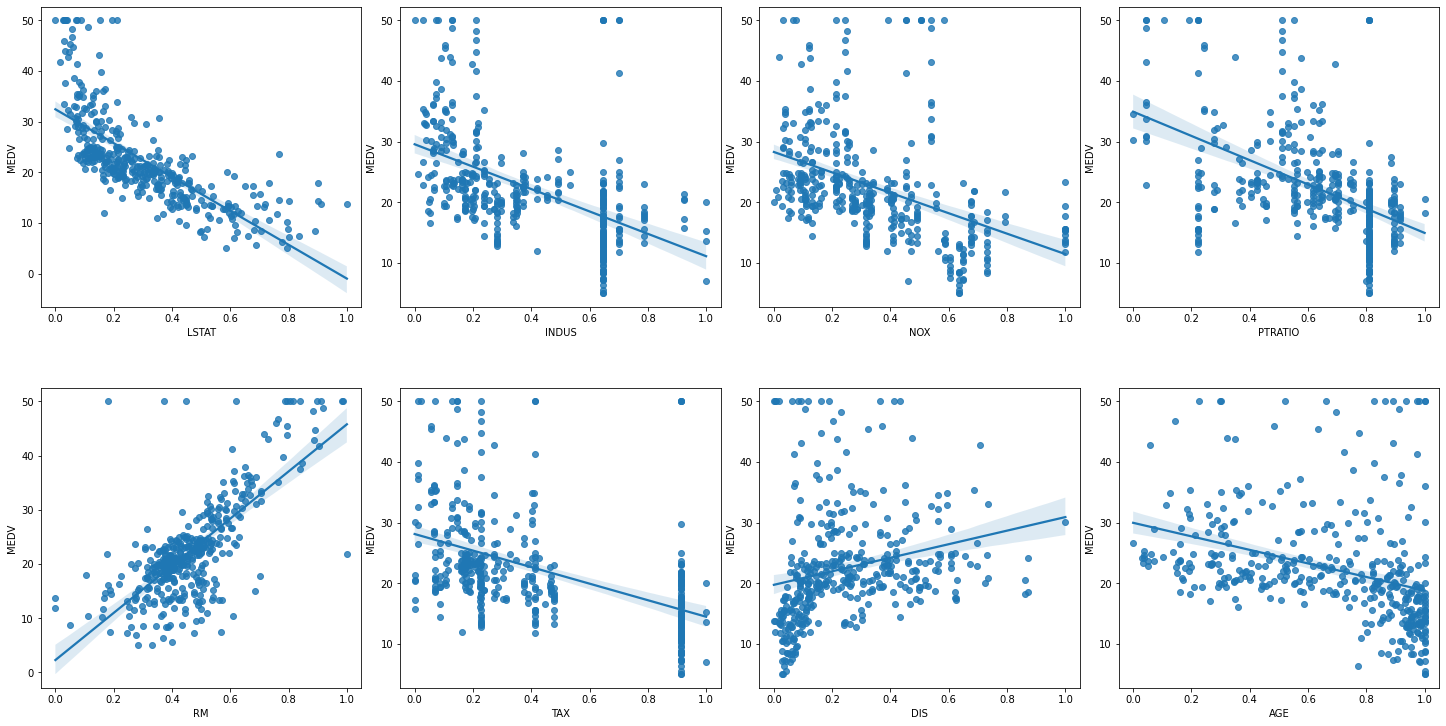

In [10]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
boston = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,boston]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=boston)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(boston):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [12]:
test_df = pd.read_csv('/content/test.csv')
test_df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       105 non-null    int64  
 1   CRIM     105 non-null    float64
 2   ZN       105 non-null    float64
 3   INDUS    105 non-null    float64
 4   CHAS     105 non-null    int64  
 5   NOX      105 non-null    float64
 6   RM       105 non-null    float64
 7   AGE      105 non-null    float64
 8   DIS      105 non-null    float64
 9   RAD      105 non-null    int64  
 10  TAX      105 non-null    float64
 11  PTRATIO  105 non-null    float64
 12  B        105 non-null    float64
 13  LSTAT    105 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.6 KB


In [14]:
test_df.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [15]:
test_df.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,52.000000,3.100574,12.800000,11.984095,0.057143,0.562010,6.253181,70.469524,3.699209,9.961905,426.219048,18.472381,345.695333,12.667238
std,30.454885,6.099267,25.384978,6.854823,0.233229,0.118159,0.679369,27.410123,2.017964,8.814241,164.240090,2.227041,106.976156,6.912011
min,0.000000,0.013600,0.000000,1.320000,0.000000,0.392000,3.561000,6.800000,1.285200,1.000000,188.000000,12.600000,3.650000,1.730000
25%,26.000000,0.100840,0.000000,6.090000,0.000000,0.449000,5.949000,47.200000,2.063500,4.000000,300.000000,16.600000,373.660000,7.120000
50%,52.000000,0.290900,0.000000,9.900000,0.000000,0.544000,6.195000,78.100000,2.783100,5.000000,391.000000,19.100000,390.740000,12.260000
75%,78.000000,4.261310,12.500000,18.100000,0.000000,0.624000,6.631000,94.500000,5.116700,24.000000,666.000000,20.200000,395.620000,17.160000
max,104.000000,45.746100,100.000000,27.740000,1.000000,0.871000,7.929000,100.000000,9.220300,24.000000,711.000000,21.200000,396.900000,36.980000


In [16]:
## modeling
## linear regression
from sklearn.linear_model import LinearRegression
X_train=data.drop(columns=["MEDV"])
y_train=data["MEDV"]

In [18]:
linear=LinearRegression().fit(X_train,y_train)
X_test=test_df
y_test=linear.predict(X_test)
print(linear.score(X_test,y_test))

1.0


In [19]:
## output
output={"id":test_df["ID"],"Output":y_test}
Output_data=pd.DataFrame(output)
Output_data

,id,Output
0,0,23.735068
1,1,24.951369
2,2,15.880892
3,3,19.850913
4,4,22.298946
...,...,...
100,100,24.360768
101,101,16.502128
102,102,27.571063
103,103,35.835256


In [20]:
Output_data.to_csv("output.csv")

In [21]:
##Gradient Descent

X=Output_data["id"]
y=Output_data["Output"]
#cost function 
def single_point_cost(x,y,w):   
    y_pred= w * x
    cost=( y_pred - y) **2  #linear regression
    return cost
#calculating derivative of each point
#grad function
def grad(x,y,w,):
    grad_w=2 * x * ((w * x) - y ) # derevative with respect to x
    return grad_w

In [22]:
w=0 # here we have  only one parameter
gamma=0.000001 #learning rate
all_costs=[]
for k in range(60):
    cost=0
    for i in range(len(X)):
        a=single_point_cost(X[i],y[i],w)
        cost+=a
    
    cost1=cost/len(X)  #average cost
    all_costs.append(cost1)
    grad_w=0
    for j in range(len(X)):
        b=grad(X[j],y[j],w)
        grad_w+=b
    grad_w1=grad_w/len(X)  #avearge grad
    w= w -  (gamma * grad_w1)  # in batch gradient descent update happens only one time

optimal value w is  0.11287143767763233


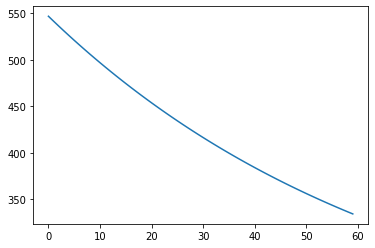

In [23]:
print("optimal value w is ",w) #optimal value of w
epochs=np.arange(60)
plt.plot(epochs,all_costs)

optimal value w is  0.29646867267766625


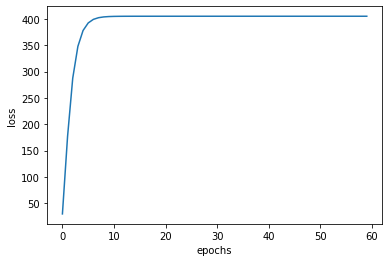

In [25]:
all_costs23=[]
w=0
gamma=0.000001
for k in range(60):
    for i in range(len(X)):
        cost21=single_point_cost(X[i],y[i],w)
        grad_w21=grad(X[i],y[i],w)
        w= w- (gamma * grad_w21) # in sgd update takes place after every point
    all_costs23.append(cost21)

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs23)

optimal value w is  0.22030569406983838


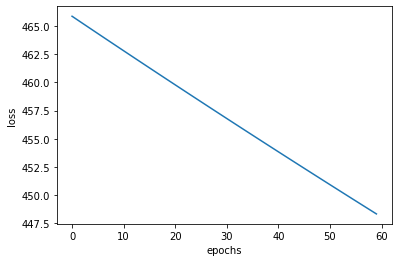

In [26]:
# let our batch size = 5
#so we will have 2 batches because n=10  and updates will happen 2 times 
w=0
gamma=0.000001
batch_size= 5
all_costs41=[]
for k in range(60):
    for j in range(int(len(X)/batch_size)):
        cost4=0
        for i in range(batch_size):
            z1=single_point_cost(X[i],y[i],w)
            cost4+=z1
        if j==1:
            all_costs41.append(cost4/batch_size) #avearge cost of that batch
        grad_w41=0
        for n in range(batch_size):
            f1=grad(X[i],y[i],w)
            grad_w41+=f1
    
        grad_w42=grad_w41/batch_size  #average grad of that function

        w= w- (gamma * grad_w42)  # update takes place after every batch

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs41)

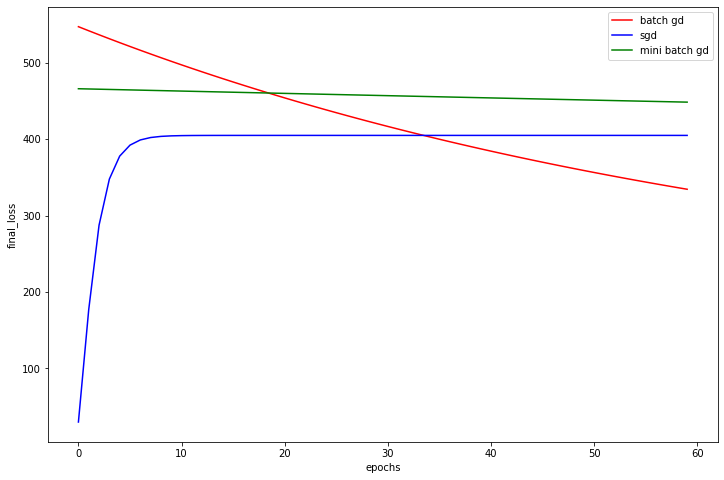

In [27]:
plt.figure(figsize=(12,8))
plt.plot(epochs,all_costs,c='r',label="batch gd")
plt.plot(epochs,all_costs23,c='b',label="sgd")
plt.plot(epochs,all_costs41,c='g',label="mini batch gd")
plt.xlabel("epochs")
plt.ylabel("final_loss")
plt.legend()
plt.show()